# Machine Learning Exercises

Below are some elementary exercises involving optimisation of an error function, Maximum Likelihood and Maximum A Posteriori estimation and Laplace approximations.

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Bphi}{\boldsymbol{\mathsf{\phi}}}$
$\newcommand{\BPhi}{\boldsymbol{\Phi}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2, #3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1 \Cond #2, #3)}$
$\newcommand{\Ex}[2][]{\mathbb{E}_{#1} \left[ #2 \right]}$
$\newcommand{\var}[1]{\operatorname{var}[#1]}$
$\newcommand{\cov}[1]{\operatorname{cov}[#1]}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\DeclareMathOperator*{\argmax}{arg\,max}$

(Please evaluate this cell to activate the $\LaTeX$ macros.)

In [1]:
import csv, scipy, scipy.stats, collections, itertools
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## 2A: Representation of optimal parameter
Consider a parametric model governed by the parameter vector $\mathbf{w}$ together with a dataset of input values $\mathbf{x}_1,\ldots,\mathbf{x}_N$ and a nonlinear feature mapping $\phi(\mathbf{x})$. Suppose that the dependence of the error function on $\mathbf{w}$ takes the form $J(\mathbf{w}) = f(\mathbf{w}^\top \phi(\mathbf{x}_1), \ldots, \mathbf{w}^\top \phi(\mathbf{x}_N)) + g(\mathbf{w}^\top \mathbf{w})$
where $g(\cdot)$ is a monotonically increasing function. By writing $\mathbf{w}$ in the form
$$
\mathbf{w} = \sum_{n=1}^N \alpha_n \phi(\mathbf{x}_n) + \mathbf{w}_\perp
$$
show that the value of $\mathbf{w}$ that minimizes $J(\mathbf{w})$ takes the form of a linear combination of the basis functions $\phi(\mathbf{x}_n)$ for $n = 1, \ldots, N$.

### <span style="color:blue">Answer</span>


Suppose we have $M$ parameters so $ \mathbf{w} \in \mathbb{R}^M,$ and suppose each input has $d$ features so $\mathbf{x_i} \in \mathbb{R}^d.$ Our feature mapping is a function $\phi : \mathbb{R}^d \to \mathbb{R}^M.$ Let $K$ be the subspace of $\mathbb{R}^M$ generated by the $\phi(\mathbf{x_i})$:

\begin{align}
K &= \operatorname{span} \{ \phi(\mathbf{x_i}) \ | \ i = 1, 2, \dots, N \} \\
  &= \left\{ \sum_{n=1}^N \alpha_n \phi(\mathbf{x_n}) \ \bigg| \ \alpha_i \in \mathbb{R} \right\}
\end{align}

We can define the orthogonal complement of $K$ as 

$$ K_{\perp} = \{ \mathbf{w} \in \mathbb{R}^M \ | \ \mathbf{w}^{\top} \mathbf{k} = 0 \text{ for all } \mathbf{k} \in K \}$$

and it is easily seen that is this also a subspace of $\mathbb{R}^M,$ and that $K \cap K_{\perp} = \{ 0 \}.$

The Orthogonal decomposition theorem states that $$ \mathbb{R}^M = K \oplus K_{\perp}.$$

This means that any element in $\mathbb{R}^M$ can be written in the form $\mathbf{k} + \mathbf{k}_{\perp}, \ \mathbf{k} \in K, \mathbf{k}_{\perp} \in K_{\perp}$ and this decomposition is unique.

Let us decompose our parameter vector in this way: $ \mathbf{w} = \hat{\mathbf{w}} + \mathbf{w}_{\perp}, $ where $ \hat{\mathbf{w}} \in K, \mathbf{w}_{\perp} \in K_{\perp}.$

For all $i = 1,2, \ldots, N$ we have 

\begin{align}
\mathbf{w}^\top \phi(\mathbf{x_i}) &= (\hat{\mathbf{w}}^\top + \mathbf{w}^{\top}_{\perp} ) \phi( \mathbf{x_i} ) \\
                              &= \hat{\mathbf{w}}^\top \phi( \mathbf{x_i} ) + \mathbf{w}^{\top}_{\perp} \phi( \mathbf{x_i} ) \\
                              &= \hat{\mathbf{w}}^\top \phi( \mathbf{x_i} )
\end{align}

The second term vanishes because $\phi( \mathbf{x_i} ) \in K$ (by the definition of $K$, it is one of the generating elements) and $\mathbf{w}_{\perp} \in K_{\perp},$ so by definition it has zero inner product with elements in $K.$

Note that

\begin{align}
\mathbf{w}^\top \mathbf{w} &= ( \hat{\mathbf{w}} + \mathbf{w}_{\perp} )^\top ( \hat{\mathbf{w}} + \mathbf{w}_{\perp} ) \\
                           &=  ( \hat{\mathbf{w}}^{\top} + \mathbf{w}^{\top}_{\perp}) (\hat{\mathbf{w}} + \mathbf{w}_{\perp} ) \\
                           &= \hat{ \mathbf{w}}^{\top} \hat{ \mathbf{w}} + \hat{\mathbf{w}}^{\top} \mathbf{w}_{\perp} + \mathbf{w}_{\perp}^{\top} \hat{\mathbf{w}} + \mathbf{w}_{\perp}^{\top} \mathbf{w}_{\perp} \\
                           &= \hat{ \mathbf{w}}^{\top} \hat{ \mathbf{w}} + \mathbf{w}_{\perp}^{\top} \mathbf{w}_{\perp} \\
                           &= \| \hat{ \mathbf{w} } \|^2 + \| \mathbf{w}_{\perp} \|^2
\end{align}

Substituting these into the error term gives

\begin{align}
J(\mathbf{w}) &= f( \mathbf{w}^\top \phi(\mathbf{x_1}), \ldots, \mathbf{w}^\top \phi(\mathbf{x_N}) ) + g(\mathbf{w}^\top \mathbf{w} ) \\
               &= f( \hat{\mathbf{w}}^\top \phi(\mathbf{x_1}), \ldots, \hat{\mathbf{w}}^\top \phi(\mathbf{x_N}) ) + g(\| \hat{ \mathbf{w} } \|^2 + \| \mathbf{w}_{\perp} \|^2 ) \\
               &\geq f( \hat{\mathbf{w}}^\top \phi(\mathbf{x_1}), \ldots, \hat{\mathbf{w}}^\top \phi(\mathbf{x_N}) ) + g(\| \hat{ \mathbf{w} } \|^2) \\
               &= J(\hat{\mathbf{w}}).
\end{align}

The inequality arose from the fact that $g$ is monotonically increasing, and equality holds if and only if $\mathbf{w}_{\perp} = 0$ i.e. if $\mathbf{w} \in K.$ Therefore, if $\mathbf{w}$ minimizes $J$ then it is a linear combination of the basis functions.

## Maximum likelihood (ML) and Maximum A Posteriori (MAP)
We assume data samples $X_n = \{ x_1,\dots,x_n \}$ are generated i.i.d. from a uniform distribution
$ \DUniform{x}{0}{\theta} $ between $ 0 $ and an unknown positive parameter $\theta$:
$$
   p(x \Cond \theta) = \DUniform{x}{0}{\theta} = 
\begin{cases}
 1/\theta & 0 \leq x \leq \theta \\
 0        & \textrm{otherwise} \\
\end{cases}
$$

Assume the data samples $ X_4 = \{ 5, 7, 3, 9 \}$ have been observed.

1. Calculate $\theta_{ML} = \argmax_{\theta} p(X_4 \Cond \theta)$, 
the maximum likelihood estimate of $\theta$ for the observed data.

- Calculate $p(\theta \Cond X_4)$, the posterior distribution of $\theta$ given that the 
data $ X_4 $ have been observed and 
the initial distribution for $\theta$ is given as $p(\theta) = p(\theta \Cond X_0) = \DUniform{x}{0}{10}$.

- Calculate $\theta_{MAP} = \argmax_{\theta} p(\theta \Cond X_4)$, the maximum a posteriori
estimate of $\theta$ given the data $ X_4 $ and the initial distribution $p(\theta)$ as in the previous question.

- Calculate $\theta_{ML}$, $p(\theta \Cond X_4)$, and $\theta_{MAP}$ for the case that the observed data are $ X_4 = \{ 9, 5, 7, 3 \}$ instead of the $ X_4 = \{ 5, 7, 3, 9 \}$ given above.

### <span style="color:blue">Answer</span>


Q1. For any subset $B\subseteq A$, we can define an indicator function $ \mathbf{1}_B : A \to \mathbb{R}$ by 

$$\mathbf{1}_B(x) := \begin{cases} 
      1 & x\in B \\
      0 & x\notin B 
   \end{cases} $$

Since the data samples are generated independently, we can factorise the likelihood as 

\begin{align}
p(X_4 \ | \ \theta) &= \prod_{i=1}^n p(x_i \ | \ \theta) \\
                    &= \begin{cases} 
      \theta^{-4} & \theta \geq \max(X_4) \\
      0 & \theta< \max(X_4) 
   \end{cases} \\
                   &= \theta^{-4} \mathbf{1}_{[ \max(X_4), \infty)} (\theta)
\end{align}

Since $\theta^{-4}$ is decreasing for $\theta \in (0,\infty),$ this is maximised when $\theta = \max(X_4) = 9.$ So $\theta_{ML} = 9.$


Q2. By Bayes' theorem, the posterior distribution can be calculated:

\begin{align}
p( \theta \ | \ X_4) &= \frac{ p(X_4 \ | \ \theta) \cdot p(\theta) }{ \int_{\mathbb{R}} p(X_4 \ | \ \hat{\theta}) \cdot p(\hat{\theta}) d\hat{\theta}}\\
                     &= \frac{ \theta^{-4} \mathbf{1}_{[9,\infty)} (\theta) \cdot \frac{1}{10} \mathbf{1}_{[0,10]}(\theta) }{ \int_{\mathbb{R}} \hat{\theta}^{-4} \mathbf{1}_{[9,\infty)} (\hat{\theta}) \cdot \frac{1}{10} \mathbf{1}_{[0,10]}(\hat{\theta}) d\hat{\theta} } \\
                     &= \frac{ \theta^{-4} \mathbf{1}_{[9,10]} }{ \int_9^{10} \hat{\theta}^{-4} d\hat{\theta} } \\
                     &= N \theta^{-4} \mathbf{1}_{[9,10]}
\end{align}

where $N = \left( \int^{10}_9 \hat{\theta}^{-4} d\hat{\theta} \right)^{-1} = 2187000 \ / \ 271 \approx 8070.11$ is a normalisation constant.

Q3. Similarly to Q1, since $\theta^{-4}$ is decreasing for $\theta \in (0,\infty),$ we achieve the maximum posterior $p(\theta \ | \ X_4) = N \theta^{-4} \mathbf{1}_{[9,10]}$ at $\theta = 9,$ so $\theta_{MAP} = 9.$ Note that ML and MAP estimators will always agree when the prior distribution is uniform, because then $ p( \theta \ | \ X) \propto p(X \ | \ \theta)$ (by Bayes' theorem).

Q4. All that mattered in all of our previous computation was the maximum value of the samples, not the order of the samples or even the values of the lower valued samples. So we would get the same results for $\theta_{ML}, \ p( \theta \ | \ X_4),$ and $ \theta_{MAP}$ as above.

##  Laplace Approximation
The function
$$
f(z) = z^k e^{-z^2/2} \qquad \qquad z \in [0, \infty), \qquad k > 0
$$
can be considered as an (unnormalised) probability density.

1. Verify that it is possible to approximate $ f(z) $ with the Laplace Approximation.

- Using the Laplace Approximation, find the mean and the variance of the Normal Distribution which best approximates the normalised version of $ f(z) $.

- The analytical form of the normalisation of $ f(x) $ is not so easy to find. Therefore, use Python to implement a numerical approximation using $ N = 100 $ identically sized intervals between $ 0 $ and $ a = 10 $ to calculate the normalisation 
$$
  \int_0^{\infty} f(z) \mathrm{d}z 
  \approx \int_0^{a} z^k e^{-z^2/2} \mathrm{d}z 
  \approx \sum_{i=1}^{100} \dots
$$
and report the results for the normalisation with a 
precision of $5$ digits after the comma for the three cases $ k = \{0.5, 3, 5 \}$.
            
- For each of the three cases $ k = \{0.5, 3, 5 \}$, plot the normalised function $ f(z) $
and the corresponding Normal Distribution with parameters  resulting from the Laplace Approximation.

- Why is it reasonable to replace the upper limit of $ \infty$ with $ a = 10 $ ?

### <span style="color:blue">Answer</span>


Q1. Let us rewrite our function $f$ with $f_k$ to be explicit about our parameter $k.$ To verify that it is possible to approximate $f_k$ with the Laplace Approximation, we show that $f_k$ has a unique global maximum. 

First note that $f_k(z) \geq 0$ for all $z\in [0,\infty)$ with equality if and only if $z=0,$ so $z=0$ is the unique global maximum of $f_k.$

Now, applying the product rule we have 

\begin{align}
\frac{d}{dz} f_k(z) &= kz^{k-1} \exp\left(-\frac{z^2}{2}\right) - z \exp\left(-\frac{z^2}{2}\right) \cdot z^k \\
                    &= z^{k-1} \exp\left(-\frac{z^2}{2}\right) (k - z^2) \\
                    &= (k-z^2) \cdot f_{k-1}(z)
\end{align}

so $f_k$ has critical points at $z = \sqrt{k}$ and $z=0.$ We already know the $z=0$ is the global minimum. To determine what type of critical point $z=\sqrt{k}$ gives, we compute the second derivative again via the product rule:

$$ \frac{d^2}{dz^2} f_k(z) = \frac{d}{dz} \left(f_{k-1}(z)\right) \cdot (k-z^2) - 2z  \cdot f_{k-1}(z) $$

Evaluating this at $z = \sqrt{k},$ the first term vanishes and the second term is less than 0, so $z=\sqrt{k}$ is the unique local maximum of $f_k.$ Since $f_k(0) = \lim_{x\to\infty} f_k(x) = 0,$ this is the unique global maxmimum of $f_k.$

Q2. The Laplace approximation of the normalised version of $f_k$ is given by 

$$ q(z) = \left( \frac{A}{2\pi} \right)^{1/2} \exp \left( -\frac{A}{2} (z-\sqrt{k})^2 \right) $$ 

where $A = - \frac{d^2}{dz^2} \log(f_k(z)) \bigg|_{z=\sqrt{k}}.$

To find the constant $A,$ define $g_k(z) := \log( f_k(z) ) = - z^2/2 + k \log z$. Computing derivatives:
\begin{align}
\frac{d}{dz} g_k(z) &= -z + k/z \\
\frac{d^2}{dz^2} g_k(z) &= -1 - k/z^2
\end{align}

so we have $A = 2.$ Putting this into $q(z)$ :

$$ q(z) = \frac{1}{\sqrt{\pi}} \exp \left( - (z-\sqrt{k})^2 \right).$$

Since $q(z)$ is the PDF of a random variable $Q \sim \mathcal{N}(\sqrt{k}, 1/2),$ the Normal distribution with mean $\sqrt{k}$ and variance $1/2$ best approximates the normalised version of $f_k(z).$

Q3.

In [22]:
def f(z,k):
    return z**k * np.exp( -z**2/2)
    
def normalisation_constant_approximation(k , a = None, N = None):
    '''
    Takes a float k as input, and optional integer inputs a and N.
    Returns an approximation for Integral_[0,a] f_k(x) dx by 
    computing the right-hand Riemann sum with N intervals.
    '''
    if a is None:
        a = 10
    if N is None:
        N = 100
        
    partition = np.linspace(0, a, num= N + 1)
    h = a / N
    
    return h * sum( f(partition[i+1], k) for i in range(N))

def laplace(z,k):
    return np.pi**(-0.5) * np.exp( - (z - k**0.5)**2 )

In [23]:
A ={ k: "{0:.5f}".format(normalisation_constant_approximation(k)) for k in [0.5, 3, 5] }

for key, value in A.items():
    print('The normalisation constant for k = %s is approximately %s' % (key, value))

The normalisation constant for k = 0.5 is approximately 1.02387
The normalisation constant for k = 3 is approximately 2.00000
The normalisation constant for k = 5 is approximately 8.00000


Q4.

In [24]:
def plot_f_vs_laplace(k, a = None, N = None):
    '''
    Takes a float k as input, and optional integer inputs a and N.
    Plots a graph of the normalised version of f_k vs it's Laplace approximation.
    Plot runs from z = 0 to z = a, splitting this into N equally spaced intervals
    and evaluating the functions at those points.
    
    Does not return anything.
    '''
    if a is None:
        a = 6
    if N is None:
        N = 1000
    
    z_axis = np.linspace(0, a, num= N + 1)
    
    f_vectorized = np.vectorize(f)
    f_points = f_vectorized(z_axis, k)/normalisation_constant_approximation(k)

    laplace_vectorized = np.vectorize(laplace)
    laplace_points = laplace_vectorized(z_axis, k)

    fig = plt.figure(figsize=(30,9))
    ax = fig.add_subplot(122)
    ax.plot(z_axis, laplace_points,'b-', label='Laplace')
    ax.plot(z_axis, f_points,'r-', label='$f_k$')
    ax.set_title('$f_k$ vs Laplace approximation, k = %s ' % k )
    ax.legend(loc='best')
    ax.grid()
    ax.set_ylabel('$y$')
    ax.set_xlabel(r'$z$')

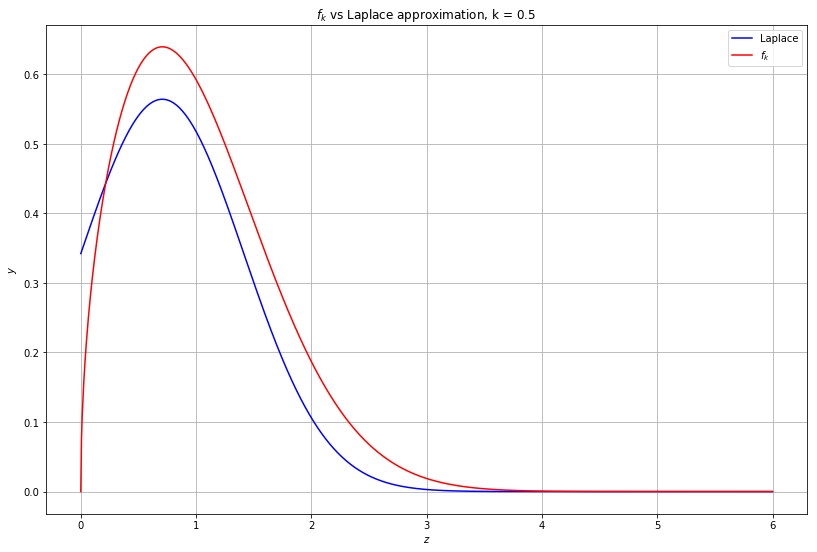

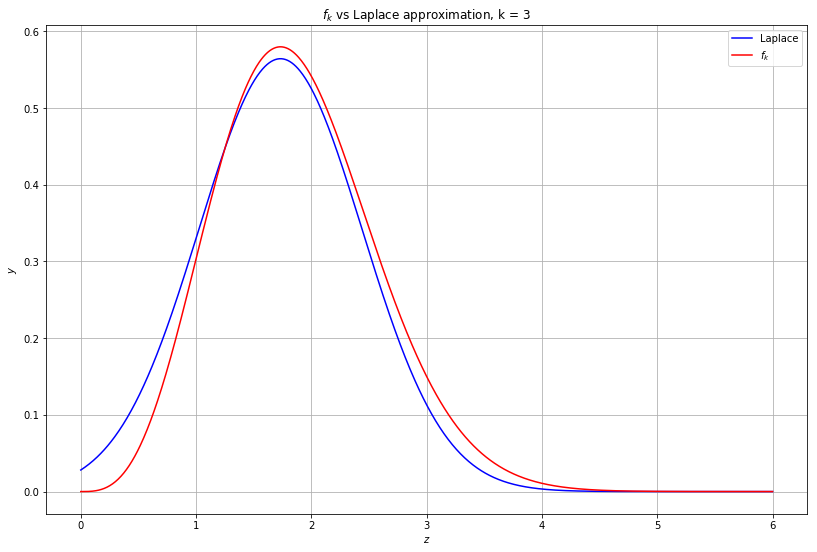

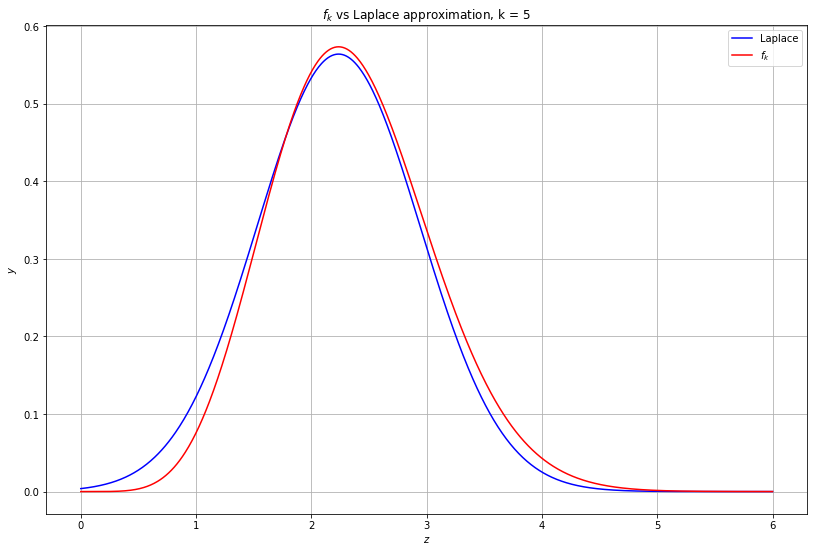

In [25]:
plot_f_vs_laplace(0.5)
plot_f_vs_laplace(3)
plot_f_vs_laplace(5)

Q5. The global maximum of $f_k$ occurs when $z= \sqrt{k},$ and the contribution towards the integral is centered around this point. For our cases of $k= 0.5, 3, 5$, we even have $4\sqrt{k} < 10.$ After the maximum, the function begins to decline rapidly as the $\exp(-z^2/2)$ begins to dominate the $z^k$ term. For our cases of $k$ the function values are extremely small compared to the maximum value by $z = 10.$ We can compute that $$ \frac{f_k(10)}{f_k(\sqrt{k})} = \frac{10^k e^{-50}}{(k/e)^{k/2}}$$

which e.g. for $k=5$ is approximately $4.2 \cdot 10^{-18}.$ Therefore, the vast majority of the mass contributing to the integral is contained between $z=0$ and $z=10.$

Our choice of $a = 10$ would be less suitable if we used larger $k$ where the global maximum occuring at $z = \sqrt{k}$ could be near or past $z=10,$ in which case cutting off at $z=10$ would cause us to not account for a significant portion of the integral. 